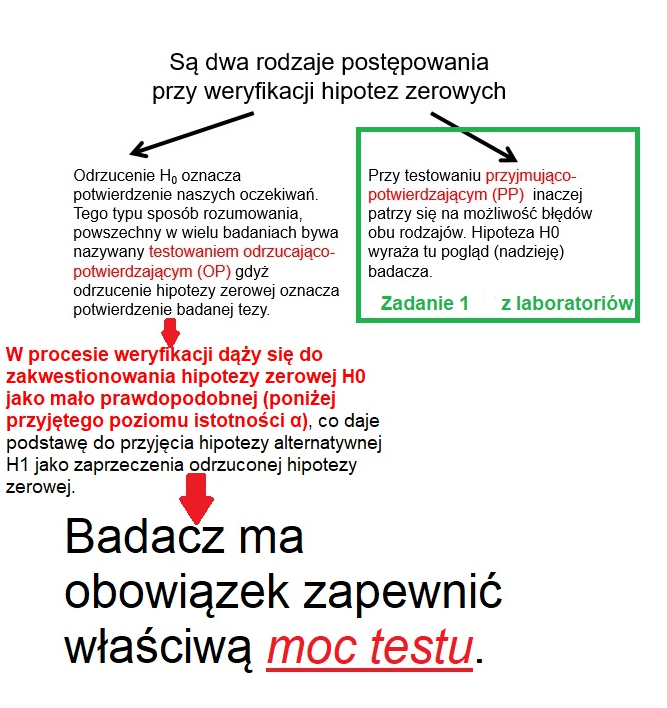

**Zadanie 2**- 
wróćmy do danych z zadania 1

Z populacji o rozkładzie normalnym N(m,2) pobrano 11-elementową próbę, wartości zostały zapisane w wektorze o nazwie proba. Na poziomie istotności alfa=0.02, 
Wiemy już, ze nie można odrzucić Ho, że m=14, ale spróbujmy postawić hipotezy inaczej

**proszę zweryfikować hipotezę, że m=13**

Co to oznacza praktycznie? Badacz mierzył jakąś wielkość, która zawsze wynosiła 13. 

Wprowadził jakąś zmianę, np. temperatury otoczenia i chce teraz wykazać, że ta zmiana wpłynęła na mierzoną wielkość (próba pochodzi z sytuacji po zmianie temperatury otoczenia).

 Hipotezę zerową badacz stawia przewrotnie - temperatura nie wpłynęła na mierzoną wartość (czyli ciągle jest równa 13). 

Badacz, odrzucając postawioną przez siebie hipotezę statystyczną tak naprawdę potwierdzi swoją hipotezę badawczą, że temperatura otoczenia ma wpływ na mierzoną wielkość! Jest to testowanie odrzucająco-potwierdzające

Badacz musi wtedy zapewnić odpowiednią MOC TESTU, czyli zapewnić odpowiednie prawdopodobieństwo, że nie popełni błędu drugiego rodzaju, czyli prawdopodobieństwo, że faktycznie odrzuci hipotezę zerową w sytuacji, gdy jest ona fałszywa (to właśnie chce pokazać badacz, a zatem musimy zapewnić, że narzędzie którym dysponuje jest wystarczająco przekonywujące - ma odpowiednią moc).

**Jak postawić hipotezę alternatywną?**
To zależy co chcemy wykazać (i na co wskazują dane z próby). 

Jeżeli badacz będzie chciał pokazać, że jego zmiana zwiększa mierzoną wartość,
 to postawi hipotezę H1: m>13,
  jeżeli odwrotnie m<13,
a jeżeli będzie chciał pokazać, że jego zmiana ma wpływ na wynik, bez określania jaki to wpływ, 
 to postawi hipotezę H1 m ≠ 13. 
 Tym ostatnim przypadkiem zajmijmy się w zadaniu.

 H0: m=13

 H1: m jest rózne od 13

 alfa=0.02

In [66]:

# Uwaga ! to model gdzie sigma jest znana, stąd nie bierzemy jej z próby !
sigma=2  
proba=[14,15,15.25,15,15,20,13.25,13,13,13,15]
#wylicz wartość średnią
import numpy as np
x_SR= np.mean(proba)
print('srednia =',x_SR)
print('sigma =',sigma)
n=len(proba)
alfa=0.02
mo=13
#wspomagając się zadaniem 1 proszę obliczyć:
# co wychodzi z testu ?
import math
U=((x_SR-mo)/sigma)*math.sqrt(n)
print('U =', U)


# jakie są obszary krytyczne ?
from scipy.special import ndtri
obszar1, obszar2=[ndtri(alfa/2) , ndtri(1-alfa/2)]
print([obszar1, obszar2])





srednia = 14.681818181818182
sigma = 2
U = 2.788979937344313
[-2.3263478740408408, 2.3263478740408408]


**Wnioskowanie:**


#Do sedna, czyli do MOCY testu:
Należy wykonać jeden wstępny krok; poniższe funkcje wyliczajace moc wymagają znormalizowanej minimalnej różnicy efektu (std_effect). 
**Kalkulator wielkości efektu D Cohena dla testu Z**
W przypadku testu Z dla pojedynczej próbki d Cohena oblicza się odejmując średnią populacji  od średniej próbki, a następnie dzieląc wynik przez odchylenie standardowe populacji. 

https://cogsci.ucsd.edu/~dgroppe/STATZ/ztest_pvalue_d.pdf

Cohen's d
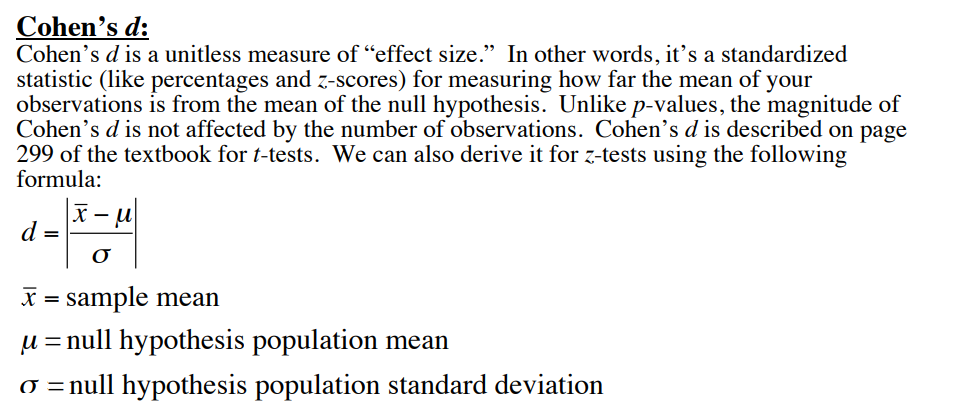


Odchylenie standardwe proszę wziąć z próby.
Interpretowanie d . Cohena

d = 0,2 Mały wpływ - średnia różnica wynosi 0,2 odchylenie standardowe
d = 0,5 Efekt średni - średnia różnica wynosi 0,5 odchylenia standardowego
d = 0,8 Duży efekt – średnia różnica wynosi 0,8 odchylenie standardowe 


In [67]:
# zmienne
alpha = 0.05
power = 0.8
n = len(proba)
import scipy.stats as stats
from statsmodels.stats.power import zt_ind_solve_power
import statsmodels.stats.proportion as prop

# do obliczenia 
std_effect=(14.681818181818182-13)/2
power=zt_ind_solve_power(effect_size = std_effect, nobs1=n, alpha=.05, power=None)
print('Moc testu: {:.3f}'.format(power))
nobs1=zt_ind_solve_power(effect_size = std_effect, nobs1=None, alpha=.05, power=.8)
print('wielkość próby: {:.3f}'.format(nobs1))

Moc testu: 0.505
wielkość próby: 22.199


Interpretacja: 
Otrzymana moc testu wynosi 50.5 % (za mało, powinna być powyżej 80%). 
Aby uzyskac moc testu powyżej 80% liczebność próby musiałaby wynosić 23 elementy.

Moc testu przez większość programów  liczona jest przy założeniu, że Ho jest fałszywa.
Każdy z programów wyznacza tą moc inaczej, podobne jest wywołanie.
______________________________________________________________________________
**Zadanie 2 - c.d.**

**Proszę wyliczyć moc testu i liczebność próby wymaganą do osiągnięcia mocy testu równej 90%, dla różnych wartości testowanej średniej (12 i 16) i różnych wariantów obszarów krytycznych (dwustronne lub jednostronne), dla różnych wartości alpha (0.05, 0.01).**

In [68]:
import scipy.stats as stats
from statsmodels.stats.power import zt_ind_solve_power
import statsmodels.stats.proportion as prop
import numpy as np
import math
from scipy.special import ndtri
sigma=2  
proba=[14,15,15.25,15,15,20,13.25,13,13,13,15]
#wylicz wartość średnią
x_SR= np.mean(proba)
print('srednia =',x_SR)
print('sigma =',sigma)
n=len(proba)
alpha1 = 0.05
power1 = 0.9
mo=17
#wspomagając się zadaniem 1 proszę obliczyć:

# co wychodzi z testu ?
U=((x_SR-mo)/sigma)*math.sqrt(n)
print('U =', U)


# jakie są obszary krytyczne ?
obszar1, obszar2=[ndtri(alfa/2) , ndtri(1-alfa/2)]
print([obszar1, obszar2])

# do obliczenia 
std_effect=abs((x_SR-mo)/sigma)
print(std_effect)
power=zt_ind_solve_power(effect_size = std_effect, nobs1=n, alpha=alpha1, power=None, alternative='larger')
print('Moc testu: {:.3f}'.format(power))
#nobs1=zt_ind_solve_power(effect_size = std_effect, nobs1=None, alpha=alpha1, power=power1)
#print('wielkość próby: {:.3f}'.format(nobs1))

srednia = 14.681818181818182
sigma = 2
U = -3.8442696433664865
[-2.3263478740408408, 2.3263478740408408]
1.1590909090909092
Moc testu: 0.858
